In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

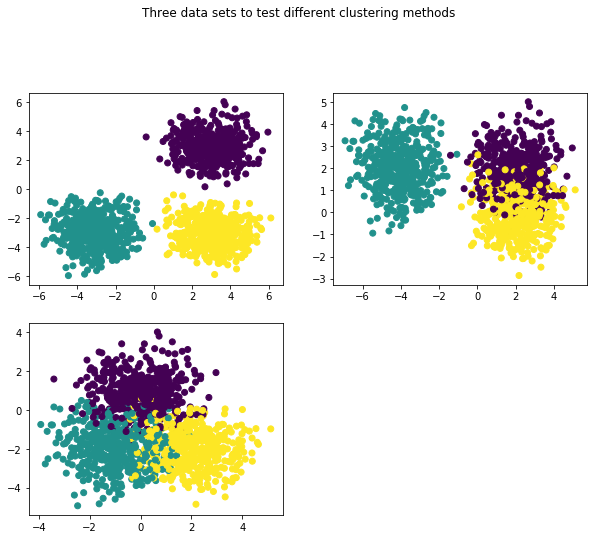

In [2]:
from sklearn.datasets.samples_generator import make_blobs
from sklearn.model_selection import train_test_split

# The coordinates of the centers of our blobs.
centers = [[3, 3], [-3, -3], [3, -3]]

# Make 10,000 rows worth of data with two features representing three
# clusters, each having a standard deviation of 1.
X, y = make_blobs(
    n_samples=1333,
    centers=centers,
    cluster_std=1,
    n_features=2,
    random_state=41)

f = plt.figure(figsize=(10, 12))
f.add_subplot(321)
plt.suptitle('Three data sets to test different clustering methods')
plt.scatter(X[:, 0], X[:, 1], c=y)

# The coordinates of the centers of our blobs.
centers = [[2, 2], [-4, 2], [2, 0]]

#Second Dataset
X2, y2 = make_blobs(
    n_samples=1333,
    centers=centers,
    cluster_std=1,
    n_features=2,
    random_state=41)

f.add_subplot(322)
plt.scatter(X2[:, 0], X2[:, 1], c=y2)


# The coordinates of the centers of our blobs.
centers = [[0, 1], [-1, -2], [2, -2]]

# Third Dataset
X3, y3 = make_blobs(
    n_samples=1333,
    centers=centers,
    cluster_std=1,
    n_features=2,
    random_state=41)

f.add_subplot(323)
plt.scatter(X3[:, 0], X3[:, 1], c=y3)
plt.show()

Number of estimated clusters: 3


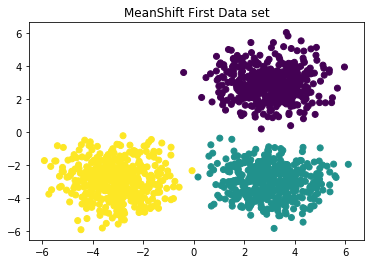

Comparing the assigned categories to the ones in the data:
col_0    0    1    2
row_0               
0      445    0    0
1        0    0  444
2        0  444    0


In [3]:
from sklearn.cluster import MeanShift, estimate_bandwidth

# Here we set the bandwidth. This function automatically derives a bandwidth
# number based on an inspection of the distances among points in the data.
bandwidth = estimate_bandwidth(X3, quantile=0.2, n_samples=500)

# Declare and fit the model.
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X)

# Extract cluster assignments for each data point.
labels = ms.labels_

# Coordinates of the cluster centers.
cluster_centers = ms.cluster_centers_

# Count our clusters.
n_clusters_ = len(np.unique(labels))

print("Number of estimated clusters: {}".format(n_clusters_))

plt.title('MeanShift First Data set')
plt.scatter(X[:, 0], X[:, 1], c=labels)
plt.show()

print('Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(y, labels))

Number of estimated clusters: 2


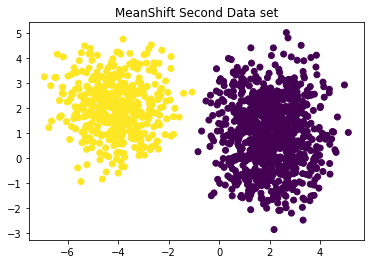

Comparing the assigned categories to the ones in the data:
col_0    0    1
row_0          
0      444    1
1        0  444
2      444    0


In [4]:
from sklearn.cluster import MeanShift, estimate_bandwidth

# Here we set the bandwidth. This function automatically derives a bandwidth
# number based on an inspection of the distances among points in the data.
bandwidth = estimate_bandwidth(X3, quantile=0.2, n_samples=500)

# Declare and fit the model.
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X2)

# Extract cluster assignments for each data point.
labels = ms.labels_

# Coordinates of the cluster centers.
cluster_centers = ms.cluster_centers_

# Count our clusters.
n_clusters_ = len(np.unique(labels))

print("Number of estimated clusters: {}".format(n_clusters_))

plt.title('MeanShift Second Data set')
plt.scatter(X2[:, 0], X2[:, 1], c=labels)
plt.show()

print('Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(y2, labels))

Number of estimated clusters: 3


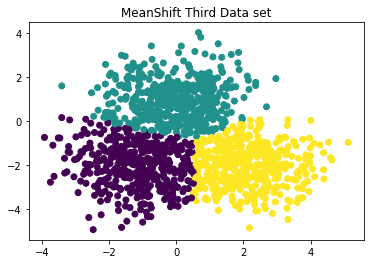

Comparing the assigned categories to the ones in the data:
col_0    0    1    2
row_0               
0       18  413   14
1      381   37   26
2       30   15  399


In [5]:
from sklearn.cluster import MeanShift, estimate_bandwidth

# Here we set the bandwidth. This function automatically derives a bandwidth
# number based on an inspection of the distances among points in the data.
bandwidth = estimate_bandwidth(X3, quantile=0.2, n_samples=500)

# Declare and fit the model.
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X3)

# Extract cluster assignments for each data point.
labels = ms.labels_

# Coordinates of the cluster centers.
cluster_centers = ms.cluster_centers_

# Count our clusters.
n_clusters_ = len(np.unique(labels))

print("Number of estimated clusters: {}".format(n_clusters_))

plt.title('MeanShift Third Data set')
plt.scatter(X3[:, 0], X3[:, 1], c=labels)
plt.show()

print('Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(y3, labels))

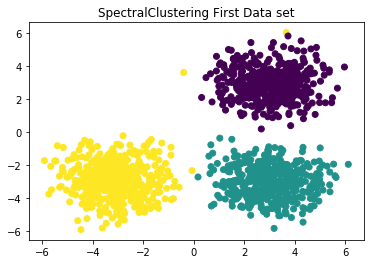

Comparing the assigned categories to the ones in the data:
col_0    0    1    2
row_0               
0      443    0    2
1        0    0  444
2        0  444    0


In [6]:
from sklearn.cluster import SpectralClustering

# We know we're looking for three clusters.
n_clusters=3

# Declare and fit the model.
sc = SpectralClustering(n_clusters=n_clusters)
sc.fit(X)

#Predicted clusters.
predict=sc.fit_predict(X)

#Graph results.
plt.title('SpectralClustering First Data set')
plt.scatter(X[:, 0], X[:, 1], c=predict)
plt.show()

print('Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(y,predict))

Odd results for this one. 

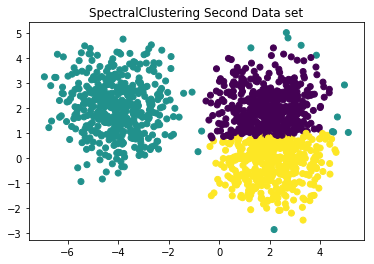

Comparing the assigned categories to the ones in the data:
col_0    0    1    2
row_0               
0      371   10   64
1        0  444    0
2       84    4  356


In [7]:
# We know we're looking for three clusters.
n_clusters=3

# Declare and fit the model.
sc = SpectralClustering(n_clusters=n_clusters)
sc.fit(X2)

#Predicted clusters.
predict=sc.fit_predict(X2)

#Graph results.
plt.title('SpectralClustering Second Data set')
plt.scatter(X2[:, 0], X2[:, 1], c=predict)
plt.show()

print('Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(y2,predict))

Getting those odd outlier results again. It looks like it's assigning odd data points to the first cluster. 

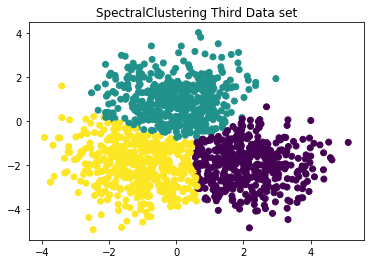

Comparing the assigned categories to the ones in the data:
col_0    0    1    2
row_0               
0       15  410   20
1       22   34  388
2      397   14   33


In [8]:
# We know we're looking for three clusters.
n_clusters=3

# Declare and fit the model.
sc = SpectralClustering(n_clusters=n_clusters)
sc.fit(X3)

#Predicted clusters.
predict=sc.fit_predict(X3)

#Graph results.
plt.title('SpectralClustering Third Data set')
plt.scatter(X3[:, 0], X3[:, 1], c=predict)
plt.show()

print('Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(y3, predict))

In [23]:
from sklearn.cluster import AffinityPropagation
from sklearn import metrics

# Declare the model and fit it in one statement.
# Note that you can provide arguments to the model, but we didn't.
af = AffinityPropagation(preference=-24).fit(X)
print('Done')

# Pull the number of clusters and cluster assignments for each data point.
cluster_centers_indices = af.cluster_centers_indices_
n_clusters_ = len(cluster_centers_indices)
labels = af.labels_

print('Estimated number of clusters: {}'.format(n_clusters_))

preferences = np.arange(-1, -500, -1)

Done
Estimated number of clusters: 21


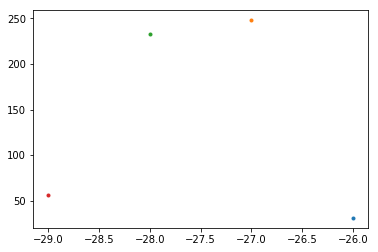

In [22]:
preferences = np.arange(-26, -30, -1)
for i in preferences:
    af2 = AffinityPropagation(preference=i).fit(X)
    cluster_centers_indices = af2.cluster_centers_indices_
    n_clusters_2 = len(cluster_centers_indices)
    plt.plot(i, n_clusters_2, '.')
    if n_clusters_ < 10:
        print(i, n_clusters_2)

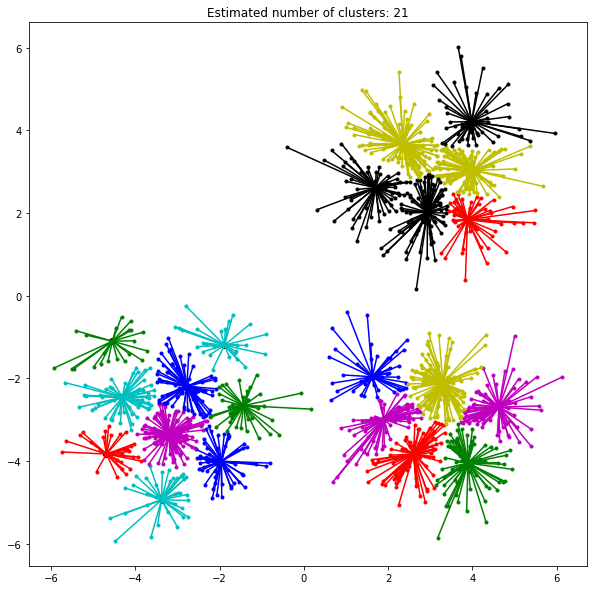

In [24]:
from itertools import cycle

plt.figure(1)
plt.clf()

# Cycle through each cluster and graph them with a center point for the
# exemplar and lines from the exemplar to each data point in the cluster.
colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
plt.figure(figsize=(10,10))
for k, col in zip(range(n_clusters_), colors):
    class_members = labels == k
    cluster_center = X[cluster_centers_indices[k]]
    
    plt.plot(X[class_members, 0], X[class_members, 1], col + '.')
    plt.plot(cluster_center[0],
             cluster_center[1],
             'o',
             markerfacecolor=col,
             markeredgecolor='k')
    for x in X[class_members]:
        plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col)

plt.title('Estimated number of clusters: {}'.format(n_clusters_))
plt.show()

hard to get desired number of clusters out of affinity propagation.  Useful if you're looking for a lot of clusters.